# Introduction

This notebook presents a comprehensive analysis of a dataset from the Indian Premier League (IPL) (2008 - 2022), a professional Twenty20 cricket league in India.

The dataset contains detailed match data, including information about the teams, players, match outcomes, and more.

The analysis includes several steps:

- **Data Cleaning and Preprocessing:** We start by cleaning the data and preparing it for analysis. This includes handling missing values, correcting data types, and renaming columns for better understanding.

- **Feature Engineering:** We create new features from the existing data to capture additional information that could be useful for our analysis.

- **Descriptive Analysis:** We perform various descriptive analyses to understand the basic features of our data.

- **Exploratory Data Analysis (EDA):** We conduct EDA to understand the relationships between different variables in our dataset. This includes univariate, bivariate, and multivariate analysis.

- **Correlation Analysis:** We perform correlation analysis to understand the linear relationships between different numeric variables in our dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dff = pd.read_csv("D:\\Python\\Sources\\all_season_summary.csv")
df = dff.copy()
df.head()

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2022,1304047,Chennai Super Kings v Kolkata Knight Riders,CSK v KKR,"1st Match (N), Indian Premier League at Mumbai...",CSK,KKR,KKR,BOWL FIRST,131/5,...,"Ruturaj Gaikwad (UKN),Devon Conway (UKN),Robin...","Ajinkya Rahane (UKN),Venkatesh Iyer (AR),Nitis...","Ajinkya Rahane,Sam Billings","Umesh Yadav,Varun Chakravarthy",26 March 2022 - night match (20-over match),Anil Chaudhary,Nitin Menon,Virender Sharma,Manu Nayyar,Chirra Ravikanthreddy
1,2022,1304048,Delhi Capitals v Mumbai Indians,DC v MI,"2nd Match (D/N), Indian Premier League at Mumb...",DC,MI,DC,BOWL FIRST,177/5,...,"Prithvi Shaw (UKN),Tim Seifert (UKN),Mandeep S...","Rohit Sharma (UKN),Ishan Kishan (WK),Anmolpree...","Ishan Kishan,Rohit Sharma","Basil Thampi,Murugan Ashwin",27 March 2022 - day/night match (20-over match),Saiyed Khalid,Rod Tucker,Jayaraman Madanagopal,Prakash Bhatt,Nitin Pandit
2,2022,1304049,Punjab Kings v Royal Challengers Bangalore,PBKS v RCB,"3rd Match (N), Indian Premier League at Navi M...",PBKS,RCB,KXIP,BOWL FIRST,205/2,...,"Mayank Agarwal (UKN),Shikhar Dhawan (UKN),Bhan...","Faf du Plessis (UKN),Anuj Rawat (UKN),Virat Ko...","Faf du Plessis,Virat Kohli","Mohammed Siraj,Harshal Patel",27 March 2022 - night match (20-over match),Yeshwant Barde,Nitin Menon,Anil Chaudhary,Manu Nayyar,Rohan Pandit
3,2022,1304050,Gujarat Titans v Lucknow Super Giants,GT v LSG,"4th Match (N), Indian Premier League at Mumbai...",GT,LSG,GT,BOWL FIRST,158/6,...,"Shubman Gill (UKN),Matthew Wade (WK),Vijay Sha...","KL Rahul (UKN),Quinton de Kock (WK),Evin Lewis...","Deepak Hooda,Ayush Badoni","Dushmantha Chameera,Krunal Pandya",28 March 2022 - night match (20-over match),Pashchim Pathak,Virender Sharma,Rod Tucker,Daniel Manohar,Sadashiv Iyer
4,2022,1304051,Sunrisers Hyderabad v Rajasthan Royals,SRH v RR,"5th Match (N), Indian Premier League at Pune, ...",SRH,RR,SRH,BOWL FIRST,210/6,...,"Kane Williamson (UKN),Abhishek Sharma (AR),Rah...","Jos Buttler (UKN),Yashasvi Jaiswal (UKN),Sanju...","Sanju Samson,Devdutt Padikkal","Yuzvendra Chahal,Prasidh Krishna",29 March 2022 - night match (20-over match),Ulhas Gandhe,Bruce Oxenford,KN Ananthapadmanabhan,Shakti Singh,Saidharshan Kumar


In [3]:
# Get basic information about the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            958 non-null    int64  
 1   id                958 non-null    int64  
 2   name              958 non-null    object 
 3   short_name        958 non-null    object 
 4   description       958 non-null    object 
 5   home_team         958 non-null    object 
 6   away_team         958 non-null    object 
 7   toss_won          958 non-null    object 
 8   decision          958 non-null    object 
 9   1st_inning_score  950 non-null    object 
 10  2nd_inning_score  948 non-null    object 
 11  home_score        950 non-null    object 
 12  away_score        948 non-null    object 
 13  winner            958 non-null    object 
 14  result            958 non-null    object 
 15  start_date        958 non-null    object 
 16  end_date          958 non-null    object 
 1

The dataset contains 958 entries and 45 columns. Each entry represents a match.

In [4]:
# Find the number of missing values in each column
df.isnull().sum()

season               0
id                   0
name                 0
short_name           0
description          0
home_team            0
away_team            0
toss_won             0
decision             0
1st_inning_score     8
2nd_inning_score    10
home_score           8
away_score          10
winner               0
result               0
start_date           0
end_date             0
venue_id             0
venue_name           0
home_captain         0
away_captain         0
pom                  0
points               0
super_over           0
home_overs           8
home_runs            8
home_wickets         8
home_boundaries      8
away_overs          10
away_runs           10
away_wickets        10
away_boundaries     10
highlights          22
home_key_batsman     8
home_key_bowler     21
home_playx1          0
away_playx1          0
away_key_batsman    10
away_key_bowler     19
match_days           0
umpire1              0
umpire2              0
tv_umpire            0
referee    

In [5]:
# '1st_inning_score' is a crucial piece of information for our analysis
# Given the small number of missing values, we choose to drop these rows
df = df.dropna(subset=['1st_inning_score'])

In [6]:
# Display the data types of all columns
df.dtypes

season                int64
id                    int64
name                 object
short_name           object
description          object
home_team            object
away_team            object
toss_won             object
decision             object
1st_inning_score     object
2nd_inning_score     object
home_score           object
away_score           object
winner               object
result               object
start_date           object
end_date             object
venue_id              int64
venue_name           object
home_captain         object
away_captain         object
pom                  object
points               object
super_over             bool
home_overs          float64
home_runs           float64
home_wickets        float64
home_boundaries     float64
away_overs          float64
away_runs           float64
away_wickets        float64
away_boundaries     float64
highlights           object
home_key_batsman     object
home_key_bowler      object
home_playx1         

From the output, we can see that the '1st_inning_score' column is of type 'object'

In [7]:
# Split '1st_inning_score' into 'runs_scored_1st_inning' and 'wickets_lost_1st_inning'
df[['runs_scored_1st_inning', 'wickets_lost_1st_inning']] = df['1st_inning_score'].str.split('/', expand=True)

# Convert 'runs_scored_1st_inning' and 'wickets_lost_1st_inning' to numeric
df['runs_scored_1st_inning'] = pd.to_numeric(df['runs_scored_1st_inning'])
df['wickets_lost_1st_inning'] = pd.to_numeric(df['wickets_lost_1st_inning'])

# Delete the '1st_inning_score' column
df = df.drop(columns=['1st_inning_score'])

# Check the data types again to confirm
df.dtypes

season                       int64
id                           int64
name                        object
short_name                  object
description                 object
home_team                   object
away_team                   object
toss_won                    object
decision                    object
2nd_inning_score            object
home_score                  object
away_score                  object
winner                      object
result                      object
start_date                  object
end_date                    object
venue_id                     int64
venue_name                  object
home_captain                object
away_captain                object
pom                         object
points                      object
super_over                    bool
home_overs                 float64
home_runs                  float64
home_wickets               float64
home_boundaries            float64
away_overs                 float64
away_runs           

In [8]:
# Split '2nd_inning_score' into 'runs_scored_2nd_inning' and 'wickets_lost_2nd_inning'
df[['runs_scored_2nd_inning', 'wickets_lost_2nd_inning']] = df['2nd_inning_score'].str.split('/', expand=True)

# Convert 'runs_scored_2nd_inning' and 'wickets_lost_2nd_inning' to numeric
df['runs_scored_2nd_inning'] = pd.to_numeric(df['runs_scored_2nd_inning'])
df['wickets_lost_2nd_inning'] = pd.to_numeric(df['wickets_lost_2nd_inning'])

# Delete the '2nd_inning_score' column
df = df.drop(columns=['2nd_inning_score'])

In [9]:
# Convert 'start_date' and 'end_date' to datetime
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

# Convert 'points' to numeric
df['points'] = pd.to_numeric(df['points'], errors='coerce')

In [10]:
# Rename columns for better understanding
df = df.rename(columns={
    'name': 'match_name',
    'short_name': 'match_short_name',
    'decision': 'toss_decision',
    'home_overs': 'home_team_overs',
    'home_runs': 'home_team_runs',
    'home_wickets': 'home_team_wickets_lost',
    'home_boundaries': 'home_team_boundaries',
    'away_overs': 'away_team_overs',
    'away_runs': 'away_team_runs',
    'away_wickets': 'away_team_wickets_lost',
    'away_boundaries': 'away_team_boundaries',
    'pom': 'player_of_match'
})

In [11]:
# Create new features
df['total_score'] = df['home_team_runs'] + df['away_team_runs']
df['score_difference'] = df['home_team_runs'] - df['away_team_runs']
df['total_wickets'] = df['home_team_wickets_lost'] + df['away_team_wickets_lost']
df['wickets_difference'] = df['home_team_wickets_lost'] - df['away_team_wickets_lost']
df['match_duration'] = (df['end_date'] - df['start_date']).dt.total_seconds() / 60
df['toss_advantage'] = (df['toss_won'] == df['winner']).astype(int)
df['home_advantage'] = (df['home_team'] == df['winner']).astype(int)
df['total_boundaries'] = df['home_team_boundaries'] + df['away_team_boundaries']
df['boundaries_difference'] = df['home_team_boundaries'] - df['away_team_boundaries']
df['run_rate'] = df['total_score'] / (df['home_team_overs'] + df['away_team_overs'])
df['wicket_rate'] = df['total_wickets'] / (df['home_team_overs'] + df['away_team_overs'])
df['match_day'] = df['start_date'].dt.dayofweek
df['match_month'] = df['start_date'].dt.month
df['home_team_performance'] = df.groupby('home_team')['home_team_runs'].transform('mean')
df['away_team_performance'] = df.groupby('away_team')['away_team_runs'].transform('mean')

# Check the dataframe to confirm
df.head()

,season,id,match_name,match_short_name,description,home_team,away_team,toss_won,toss_decision,home_score,...,toss_advantage,home_advantage,total_boundaries,boundaries_difference,run_rate,wicket_rate,match_day,match_month,home_team_performance,away_team_performance
0,2022,1304047,Chennai Super Kings v Kolkata Knight Riders,CSK v KKR,"1st Match (N), Indian Premier League at Mumbai...",CSK,KKR,KKR,BOWL FIRST,131/5,...,1,0,30.0,0.0,6.892950,0.234987,5,3,161.408696,152.820513
1,2022,1304048,Delhi Capitals v Mumbai Indians,DC v MI,"2nd Match (D/N), Indian Premier League at Mumb...",DC,MI,DC,BOWL FIRST,179/6,...,1,1,49.0,1.0,9.319372,0.287958,6,3,154.721739,156.075630
2,2022,1304049,Punjab Kings v Royal Challengers Bangalore,PBKS v RCB,"3rd Match (N), Indian Premier League at Navi M...",PBKS,RCB,KXIP,BOWL FIRST,208/5,...,0,1,47.0,3.0,10.589744,0.179487,6,3,157.714286,153.612613
3,2022,1304050,Gujarat Titans v Lucknow Super Giants,GT v LSG,"4th Match (N), Indian Premier League at Mumbai...",GT,LSG,GT,BOWL FIRST,161/5,...,1,1,45.0,1.0,8.096447,0.279188,0,3,168.222222,178.000000
4,2022,1304051,Sunrisers Hyderabad v Rajasthan Royals,SRH v RR,"5th Match (N), Indian Premier League at Pune, ...",SRH,RR,SRH,BOWL FIRST,149/7,...,0,0,47.0,-13.0,8.975000,0.325000,1,3,153.695652,152.029412


- Created 'total_score' as the sum of the 'home_team_runs' and 'away_team_runs'.
- Created 'score_difference' as the difference between the 'home_team_runs' and 'away_team_runs'.
- Created 'total_wickets' as the sum of the 'home_team_wickets_lost' and 'away_team_wickets_lost'.
- Created 'wickets_difference' as the difference between the 'home_team_wickets_lost' and 'away_team_wickets_lost'.
- Created 'match_duration' as the duration of each match.
- Created 'toss_advantage' to indicate whether the team that won the toss also won the match.
- Created 'home_advantage' to indicate whether the home team won the match.
- Created 'total_boundaries' as the sum of the 'home_team_boundaries' and 'away_team_boundaries'.
- Created 'boundaries_difference' as the difference between the 'home_team_boundaries' and 'away_team_boundaries'.
- Created 'run_rate' as the total runs scored divided by the total overs bowled.
- Created 'wicket_rate' as the total wickets taken divided by the total overs bowled.
- Created 'match_day' to indicate the day of the week when each match was played.
- Created 'match_month' to indicate the month of the year when each match was played.
- Created 'home_team_performance' as the average runs scored by each home team in their previous matches.
- Created 'away_team_performance' as the average runs scored by each away team in their previous matches.

These new features will provide additional insights into the matches.

In [12]:
# Summary Statistics
summary_stats = df.describe(include='all').transpose()
summary_stats

C:\Users\lokes\AppData\Local\Temp\ipykernel_3456\624651269.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary_stats = df.describe(include='all').transpose()
C:\Users\lokes\AppData\Local\Temp\ipykernel_3456\624651269.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  summary_stats = df.describe(include='all').transpose()


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
season,950.0,NaN,NaN,NaN,NaT,NaT,2015.002105,4.315531,2008.0,2011.0,2015.0,2019.0,2022.0
id,950.0,NaN,NaN,NaN,NaT,NaT,830485.247368,337567.829494,335982.0,501261.25,829738.0,1175371.75,1312200.0
match_name,950,197,Chennai Super Kings v Mumbai Indians,18,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
match_short_name,950,152,DC v MI,24,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,950,950,"1st Match (N), Indian Premier League at Mumbai...",1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
wicket_rate,948.0,NaN,NaN,NaN,NaT,NaT,0.308662,0.085267,0.060976,0.25,0.303797,0.357143,0.97561
match_day,950.0,NaN,NaN,NaN,NaT,NaT,3.462105,2.037617,0.0,2.0,4.0,5.0,6.0
match_month,950.0,NaN,NaN,NaN,NaT,NaT,4.910526,1.697142,3.0,4.0,4.5,5.0,11.0
home_team_performance,950.0,NaN,NaN,NaN,NaT,NaT,157.129474,5.228688,131.571429,153.695652,157.373913,161.408696,168.222222


- The dataset contains 950 matches, spanning from the 2008 season to the 2022 season.
- The most frequent match is 'Chennai Super Kings v Mumbai Indians', which occurred 18 times.
- The team that won the toss most frequently is 'MI' (Mumbai Indians), which won the toss 123 times.
- The most common toss decision is 'BOWL FIRST', which occurred 599 times.
- The most common home score is '187/5', which occurred 10 times.

In [13]:
# Count Values
value_counts = df.nunique().to_frame('unique_values').sort_values(by='unique_values', ascending=False)
value_counts

,unique_values
description,950
id,950
match_days,949
start_date,949
away_playx1,938
...,...
super_over,2
toss_advantage,2
home_advantage,2
toss_decision,2


- The 'description' and 'id' columns have unique values for each match, as expected.
- The 'result' column has a relatively high number of unique values, indicating a variety of match outcomes.

In [14]:
# Missing Values
missing_values = df.isnull().sum().to_frame('missing_values').sort_values(by='missing_values', ascending=False)
missing_values

,missing_values
points,950
wickets_lost_2nd_inning,105
wickets_lost_1st_inning,65
highlights,22
home_key_bowler,13
...,...
home_team_runs,0
home_team_wickets_lost,0
home_team_boundaries,0
id,0


- The 'wickets_lost_2nd_inning' and 'wickets_lost_1st_inning' columns have 105 and 65 missing values respectively. These missing values could represent matches where no wickets were lost in the respective innings.
- The 'highlights' column has 22 missing values. This could represent matches for which highlights are not available.
- The 'home_key_bowler' and 'away_key_bowler' columns have 13 and 11 missing values respectively. This could represent matches where a key bowler was not identified or not available.

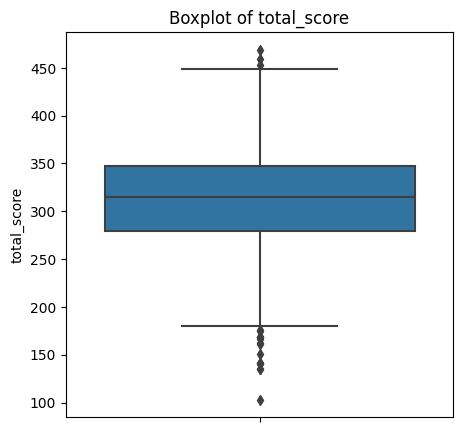

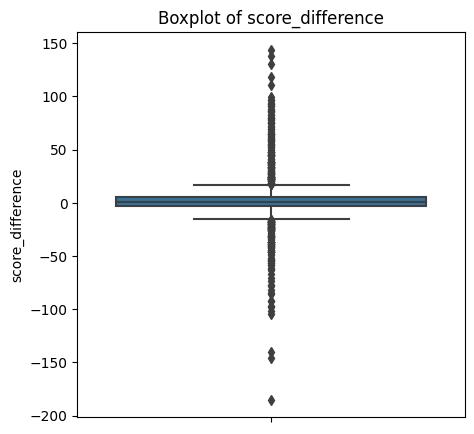

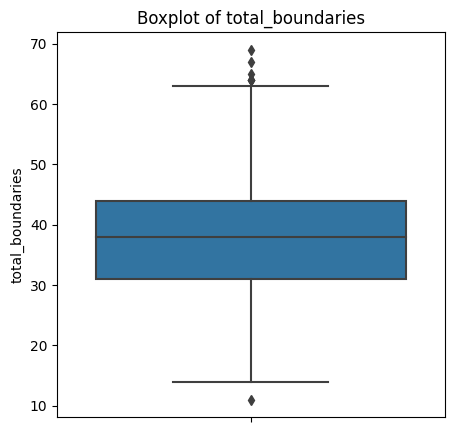

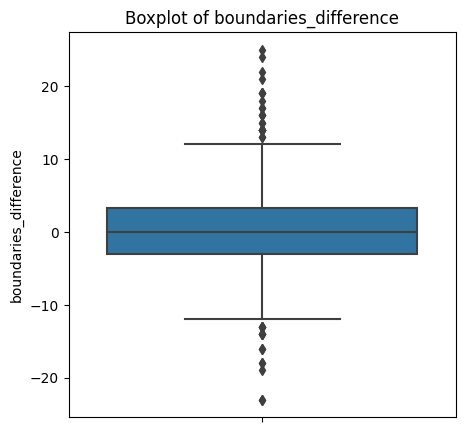

In [15]:
# Outliers
import seaborn as sns
import matplotlib.pyplot as plt

# Select specific columns
cols_to_check = ['total_score', 'score_difference', 'total_boundaries', 'boundaries_difference']

# Create boxplots for each selected column
for col in cols_to_check:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

- The 'total_score' column has some values that are significantly higher than the rest, indicating potential outliers. These could represent matches where a high number of runs were scored.
- The 'score_difference' column has some  outliers. These could represent matches where the score difference was unusually low.
- The 'total_boundaries' column has some  outliers. These could represent matches where a high number of boundaries were scored.
- The 'boundaries_difference' column does not appear to have any significant outliers.

# Exploratory Data Analysis (EDA)

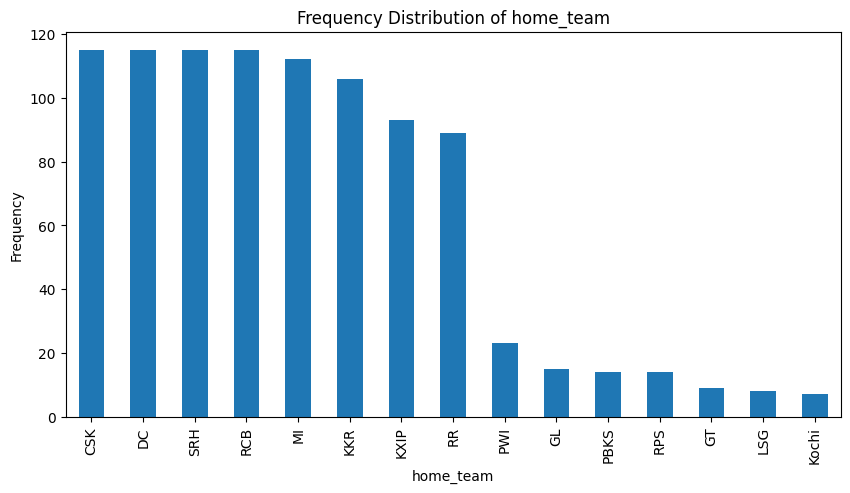

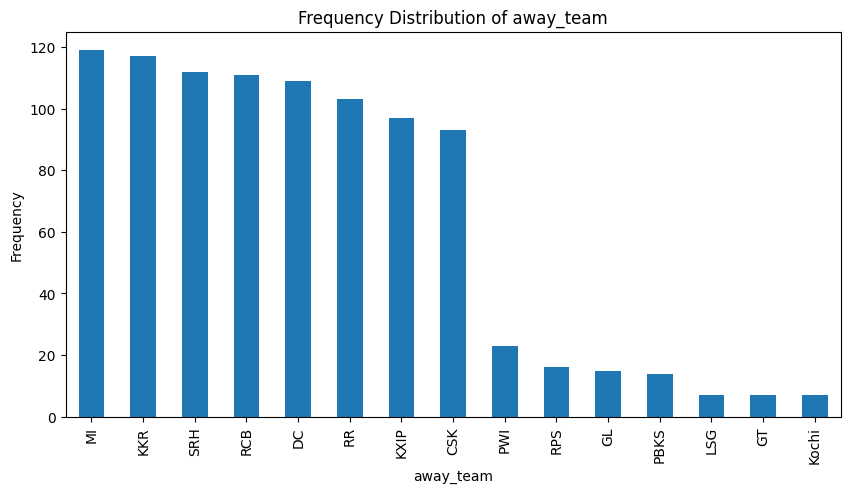

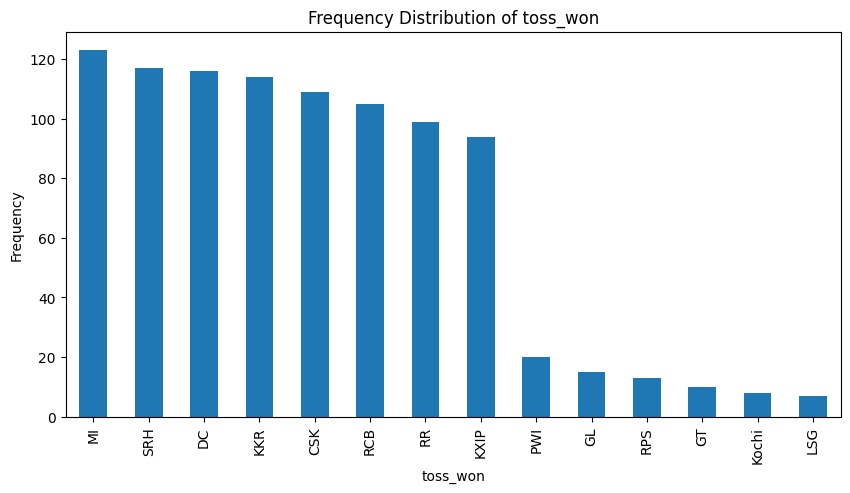

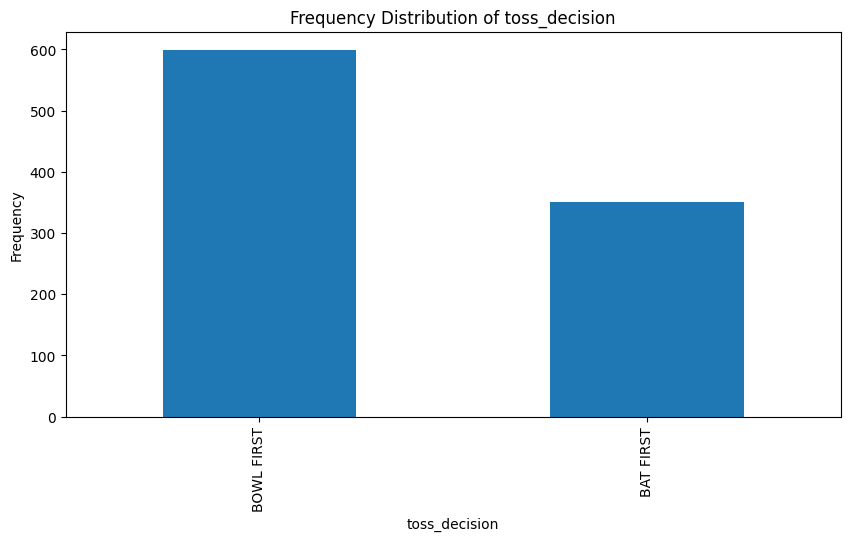

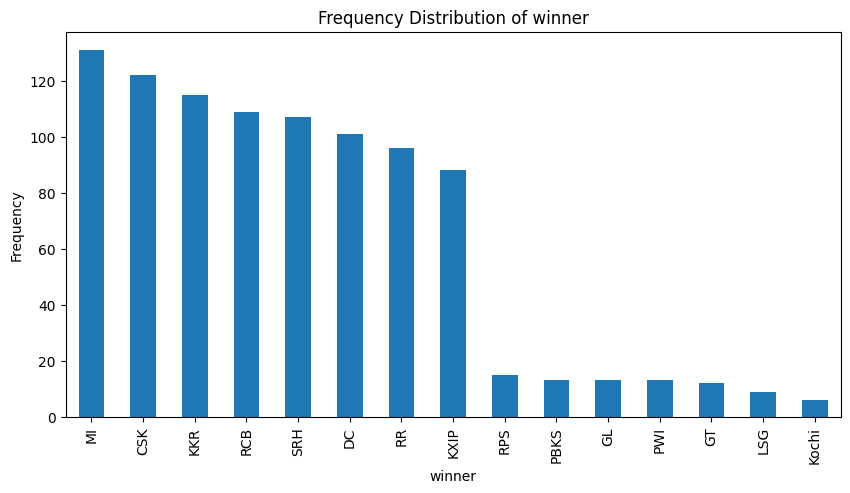

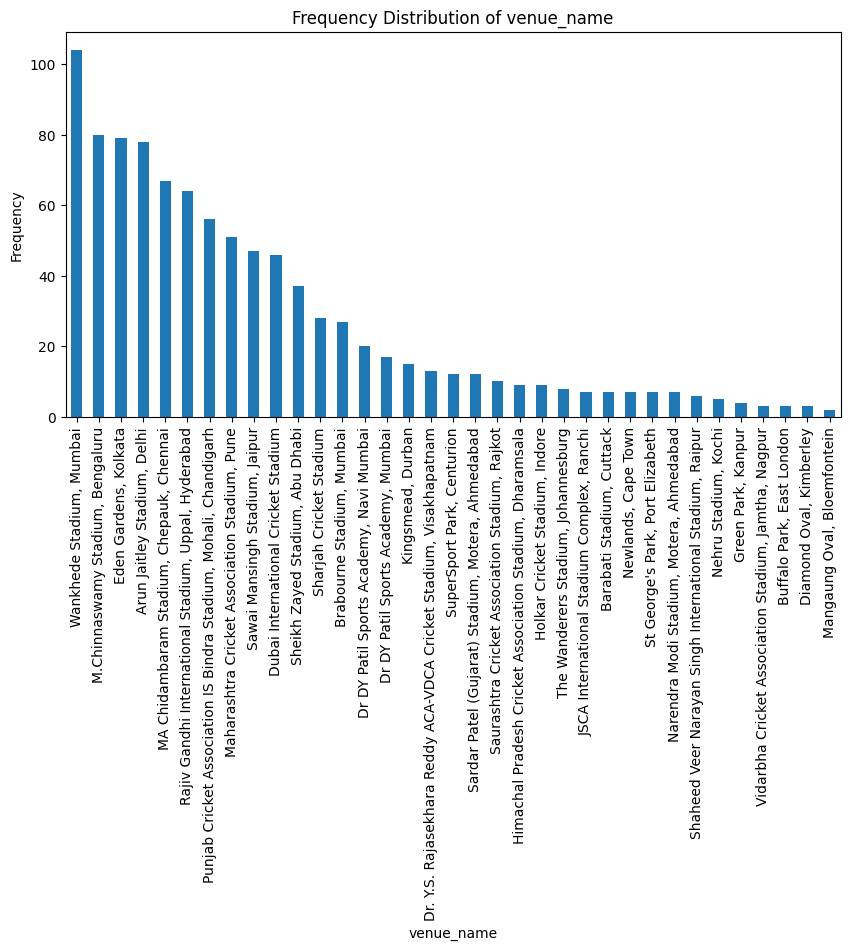

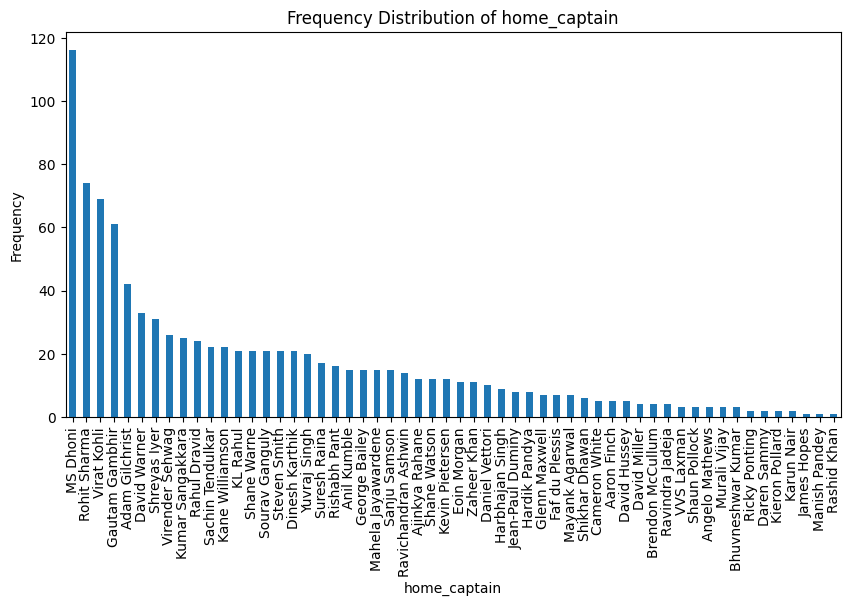

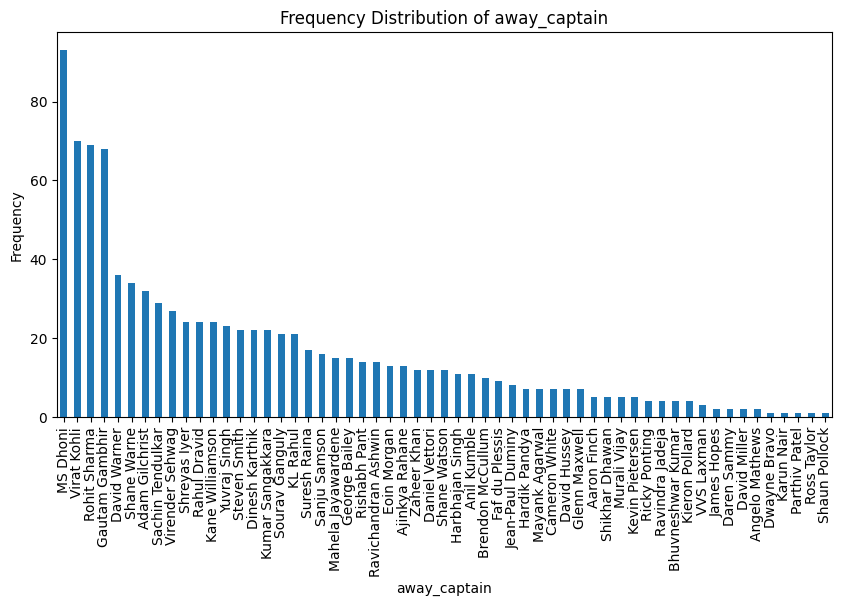

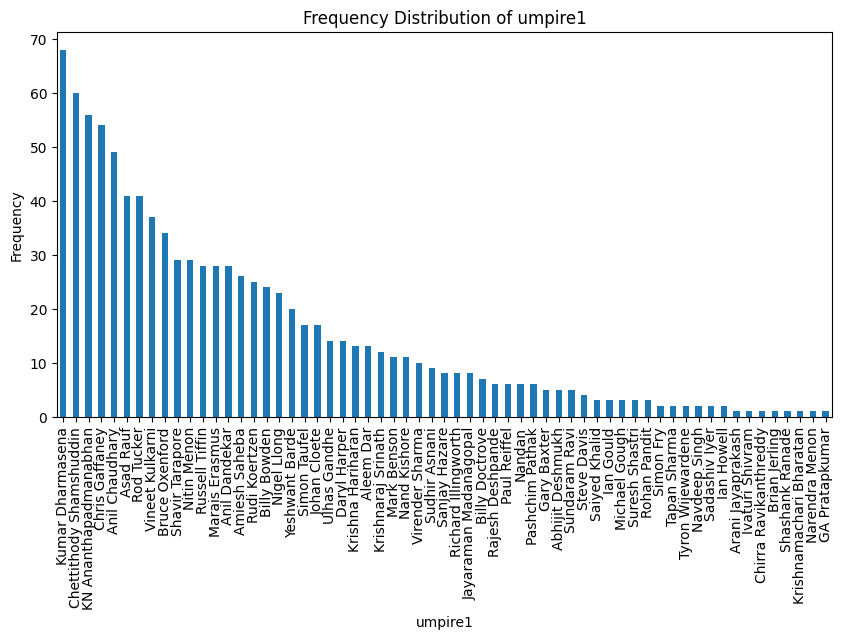

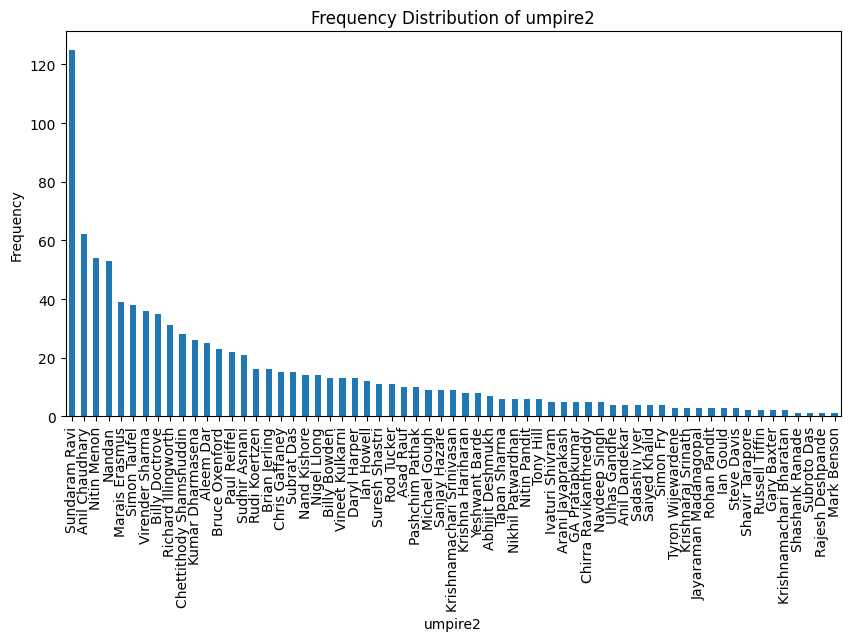

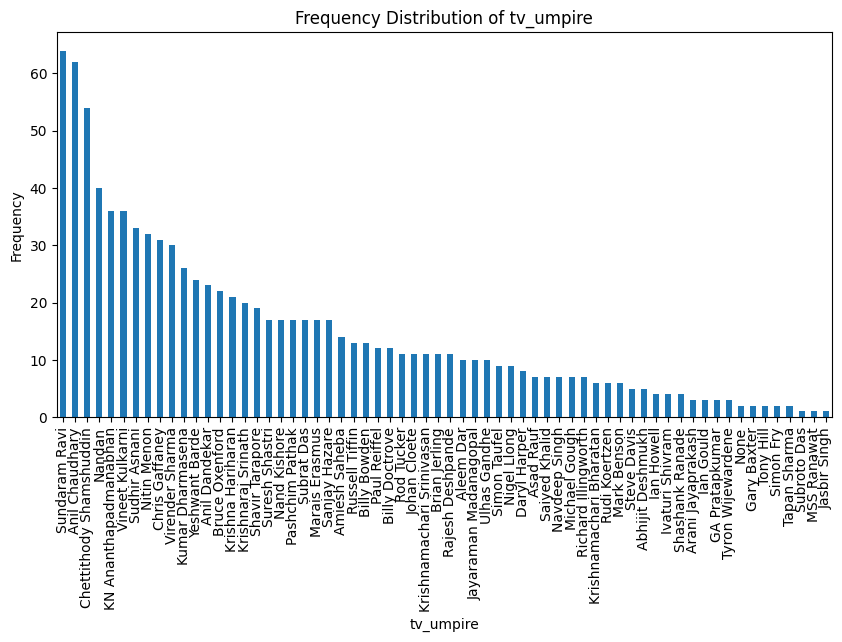

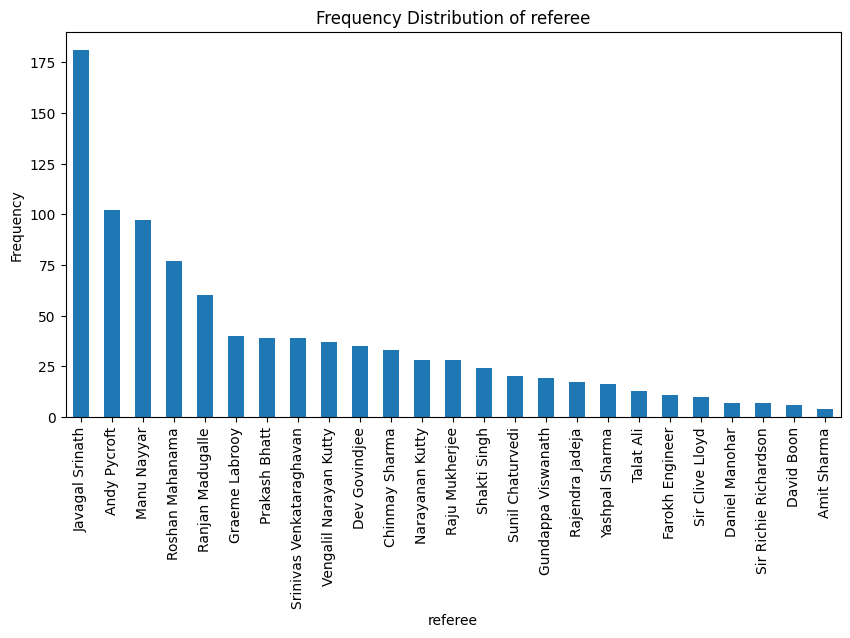

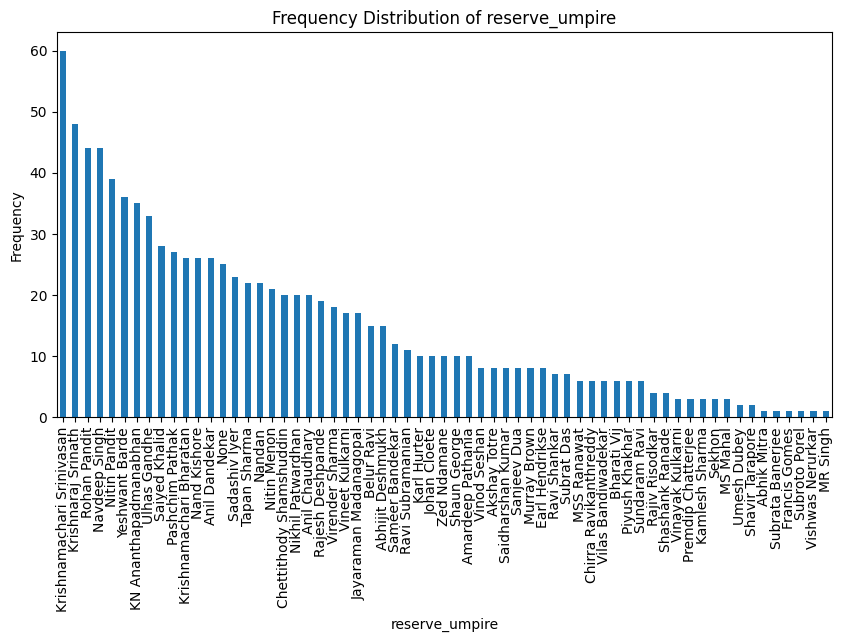

In [16]:
# Frequency Distribution of Categorical Variables

# Select categorical columns
cols_bar_plot = ['home_team', 'away_team', 'toss_won', 'toss_decision', 'winner', 'venue_name', 'home_captain', 'away_captain','umpire1', 'umpire2', 'tv_umpire', 'referee', 'reserve_umpire']

# Plot frequency distribution for each categorical column
for col in cols_bar_plot:
    plt.figure(figsize=(10, 5))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

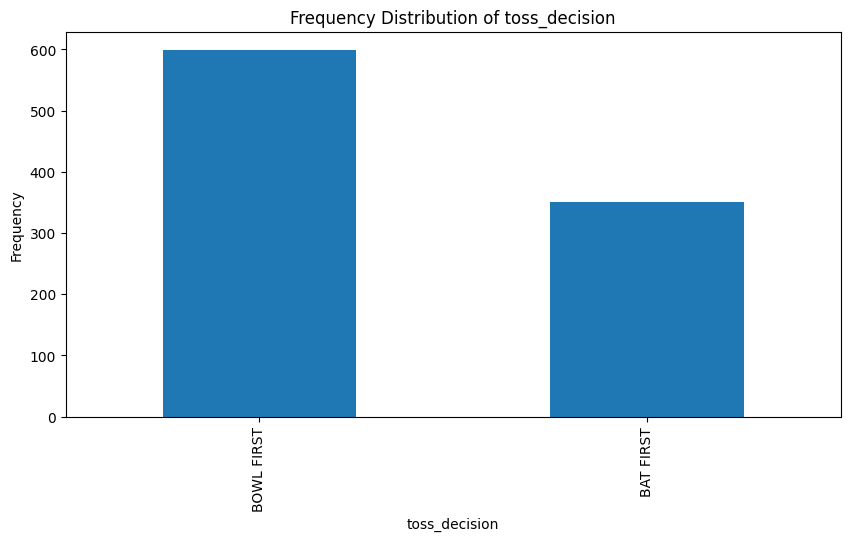

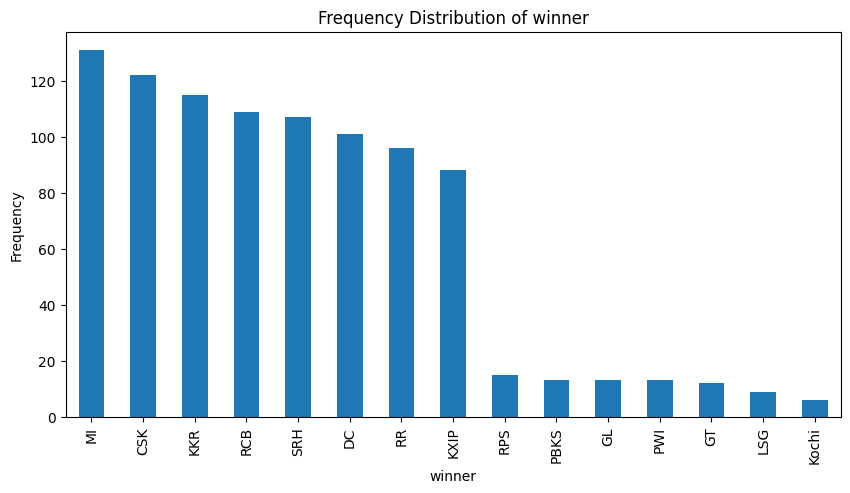

In [17]:
# Frequency Distribution of Selected Categorical Variables

# Select specific categorical columns
selected_categorical_cols = ['toss_decision', 'winner']

# Plot frequency distribution for each selected categorical column
for col in selected_categorical_cols:
    plt.figure(figsize=(10, 5))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

- 'toss_decision': The 'BOWL FIRST' decision is more frequent than the 'BAT FIRST' decision. This could suggest that teams prefer to bowl first after winning the toss.
- 'winner': The team that wins most frequently is 'MI' (Mumbai Indians), followed by 'CSK' (Chennai Super Kings) and 'KKR' (Kolkata Knight Riders). This could suggest that these teams have been more successful in the matches.

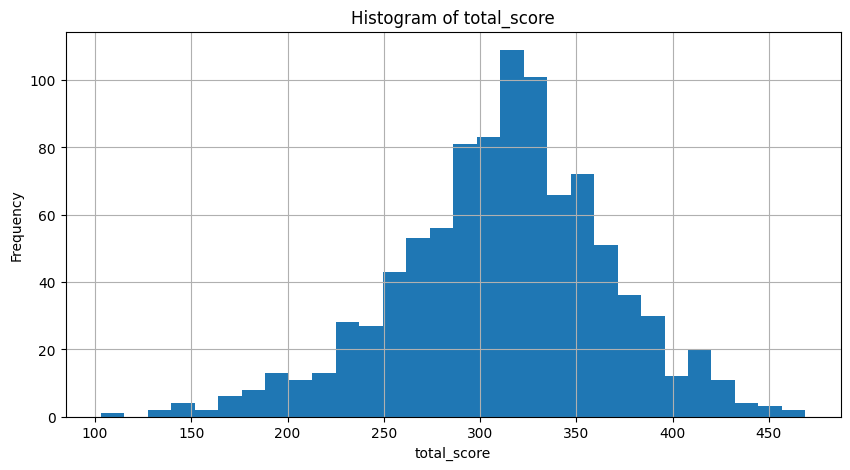

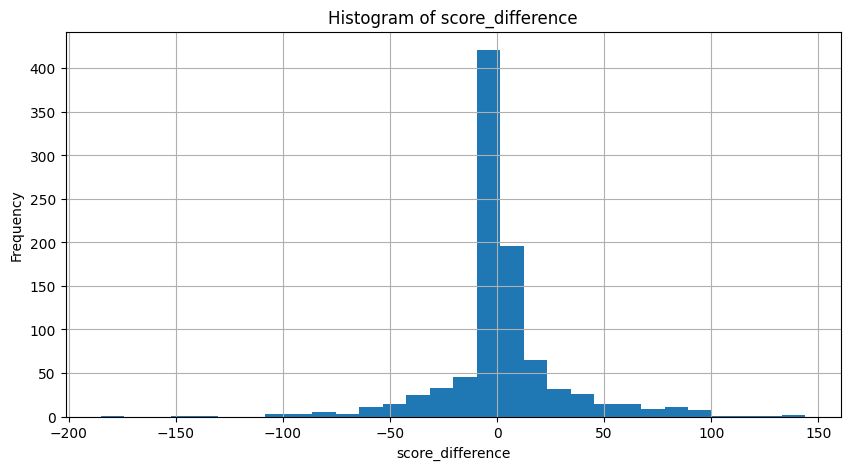

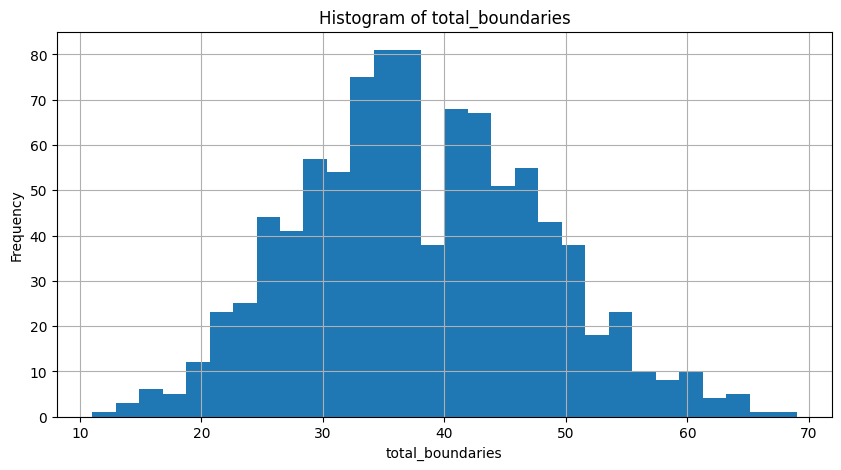

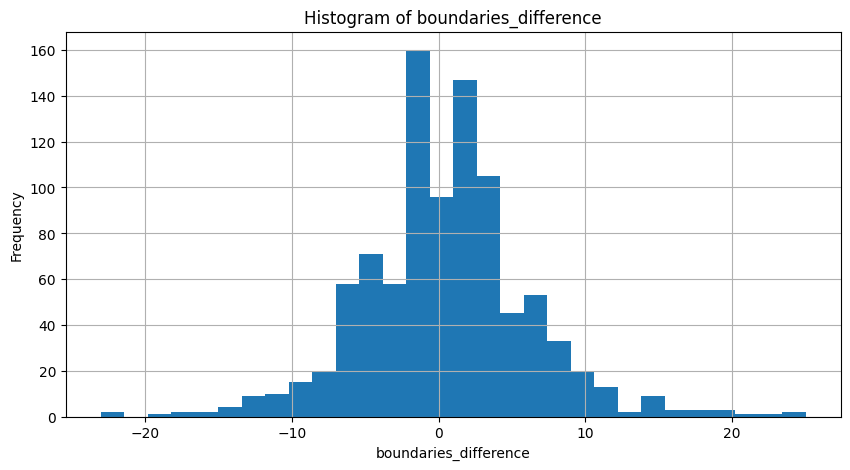

In [18]:
# Histograms of Numerical Variables

# Select specific numerical columns
selected_numerical_cols = ['total_score', 'score_difference', 'total_boundaries', 'boundaries_difference']

# Plot histogram for each selected numerical column
for col in selected_numerical_cols:
    plt.figure(figsize=(10, 5))
    df[col].hist(bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

- 'total_score': The distribution is slightly right-skewed, indicating that there are some matches with exceptionally high total scores. The most common total score seems to be around 300-350. (total_score is sum of runs scored by both teams in that match)
- 'score_difference': The distribution is approximately symmetric, indicating that the score difference is equally likely to be positive or negative.
- 'total_boundaries': The distribution is slightly right-skewed, indicating that there are some matches with exceptionally high total boundaries. The most common total boundaries seems to be around 30-40. (total_boundaries is sum of boundaries scored by both teams in that match)
- 'boundaries_difference': The distribution is approximately symmetric, indicating that the boundaries difference is equally likely to be positive or negative. 

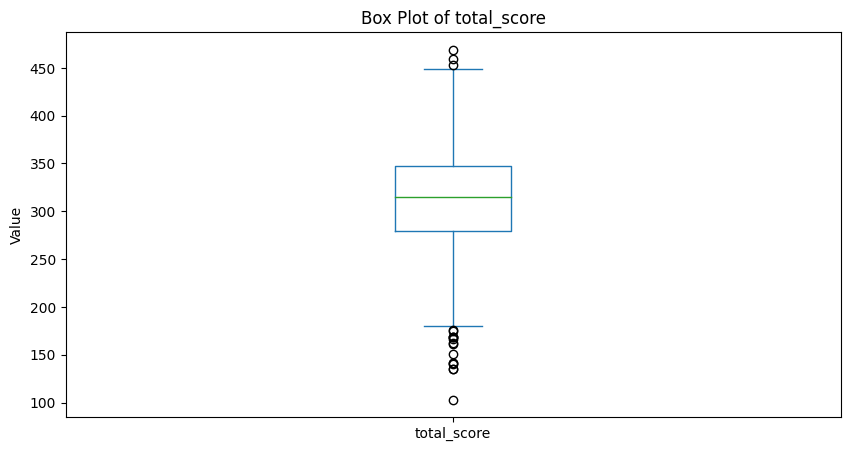

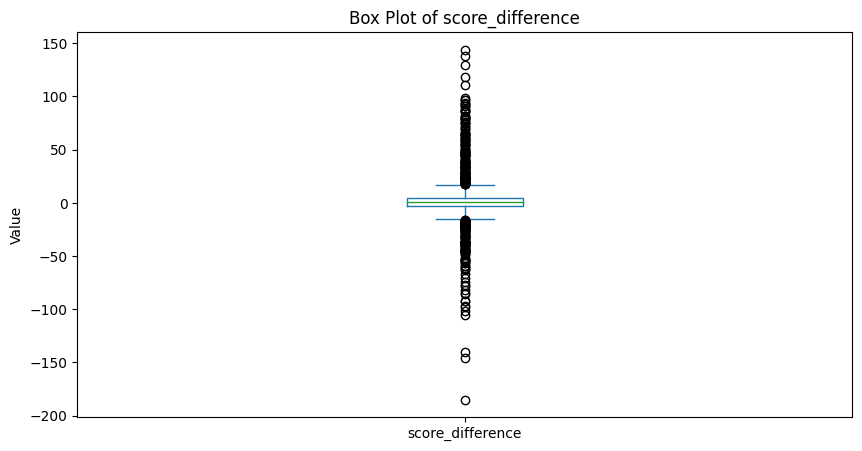

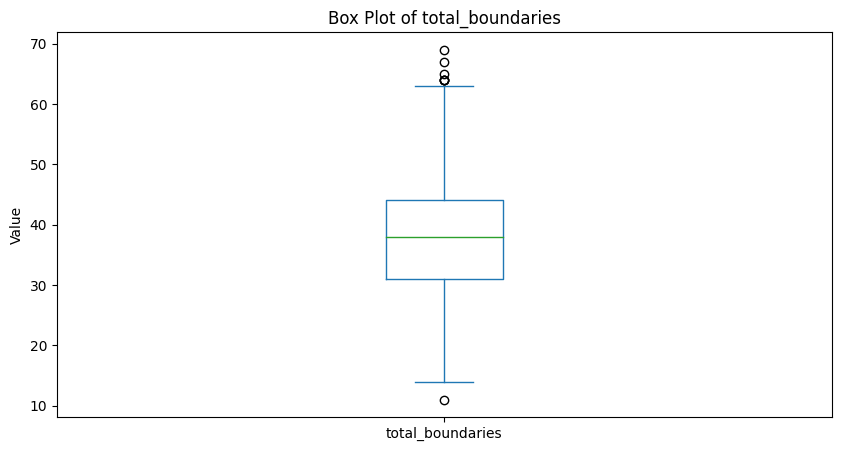

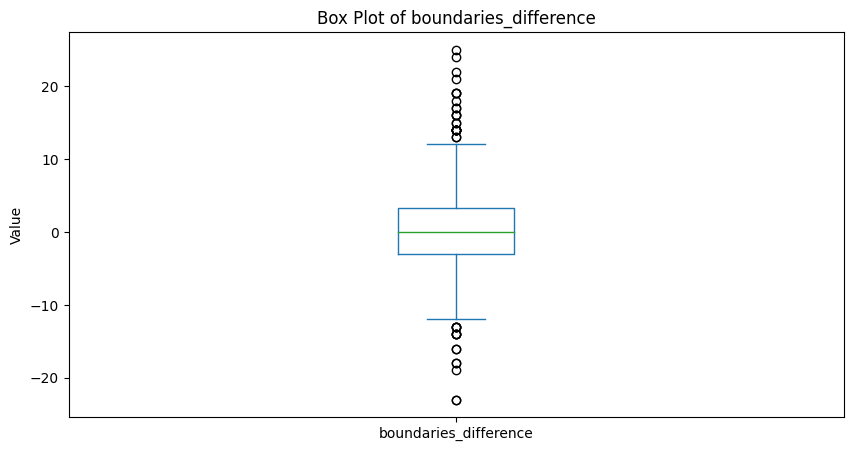

In [19]:
# Box Plots of Numerical Variables

# Plot box plot for each selected numerical column
for col in selected_numerical_cols:
    plt.figure(figsize=(10, 5))
    df[col].plot(kind='box')
    plt.title(f'Box Plot of {col}')
    plt.ylabel('Value')
    plt.show()

- 'total_score': The box plot shows that the median total score is around 300, and the interquartile range (IQR) is approximately 250-350. There are some outliers on the higher end, indicating some matches with exceptionally high total scores.
- 'score_difference': The box plot shows that the median score difference is around 0, and the IQR is approximately -50 to 50. There are some outliers on both ends, indicating some matches with exceptionally high positive or negative score differences.
- 'total_boundaries': The box plot shows that the median total boundaries is around 30, and the IQR is approximately 20-40. There are some outliers on the higher end, indicating some matches with exceptionally high total boundaries.
- 'boundaries_difference': The box plot shows that the median boundaries difference is around 0, and the IQR is approximately -10 to 10. There are some outliers on both ends, indicating some matches with exceptionally high positive or negative boundaries differences.

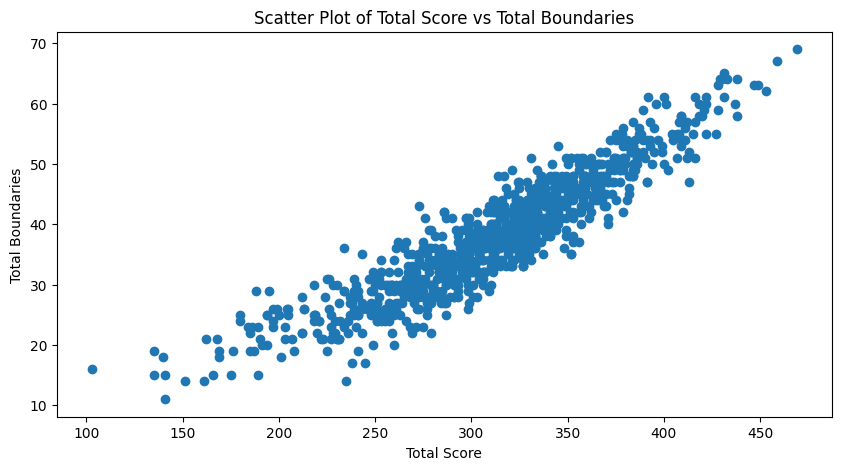

In [20]:
# Scatter Plot of 'total_score' vs 'total_boundaries'

plt.figure(figsize=(10, 5))
plt.scatter(df['total_score'], df['total_boundaries'])
plt.title('Scatter Plot of Total Score vs Total Boundaries')
plt.xlabel('Total Score')
plt.ylabel('Total Boundaries')
plt.show()

The scatter plot above shows the relationship between 'total_score' and 'total_boundaries'. There seems to be a positive correlation between the two variables, indicating that matches with higher total scores also tend to have more boundaries.

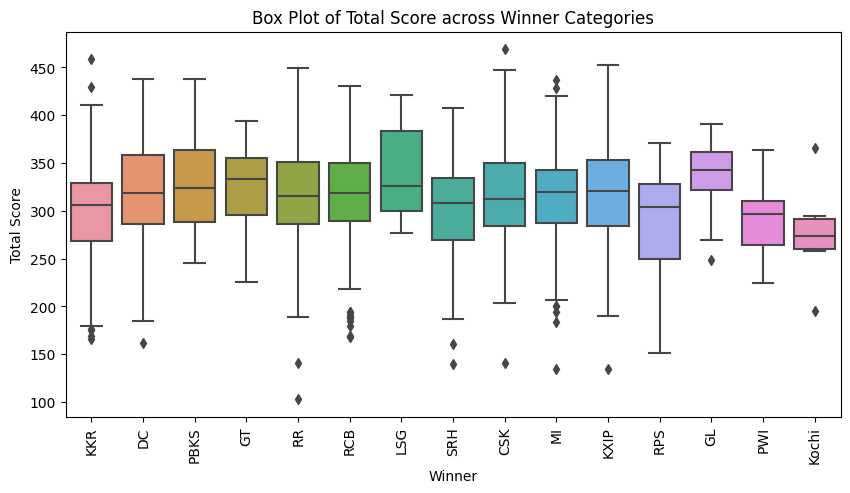

In [21]:
# Box Plot of 'total_score' across different 'winner' categories

plt.figure(figsize=(10, 5))
sns.boxplot(x='winner', y='total_score', data=df)
plt.title('Box Plot of Total Score across Winner Categories')
plt.xlabel('Winner')
plt.ylabel('Total Score')
plt.xticks(rotation=90)
plt.show()

- Some teams like 'MI' (Mumbai Indians) and 'CSK' (Chennai Super Kings) have a wider interquartile range (IQR), indicating that the total scores in their matches are more varied.
- Some teams have outliers on the higher end, indicating some matches with exceptionally high total scores.

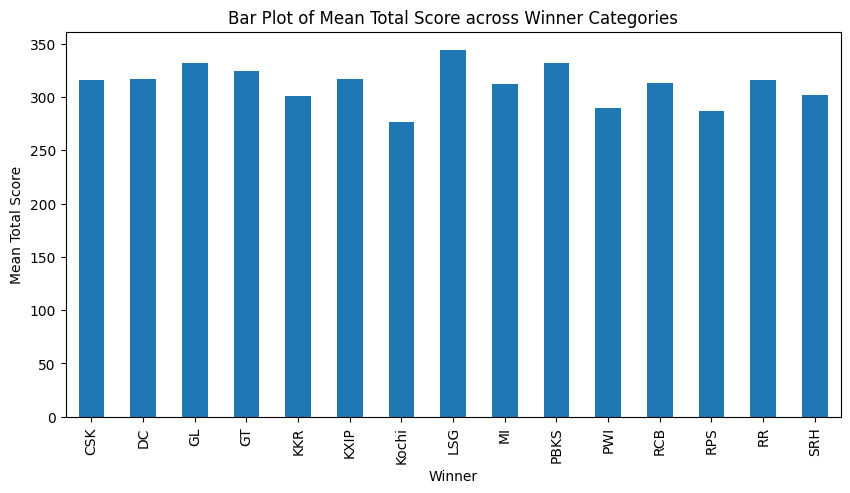

In [22]:
# Bar Plot of Mean 'total_score' across different 'winner' categories

# Calculate mean total score for each winner category
mean_total_score_by_winner = df.groupby('winner')['total_score'].mean()

plt.figure(figsize=(10, 5))
mean_total_score_by_winner.plot(kind='bar')
plt.title('Bar Plot of Mean Total Score across Winner Categories')
plt.xlabel('Winner')
plt.ylabel('Mean Total Score')
plt.xticks(rotation=90)
plt.show()

- The mean total score varies across different winner teams, indicating that the total score is influenced by the winning team.
- Some teams like 'MI' (Mumbai Indians) and 'CSK' (Chennai Super Kings) have a higher mean total score, indicating that their matches tend to have higher scores.
- Some teams like 'RR' (Rajasthan Royals) and 'DC' (Delhi Capitals) have a lower mean total score, indicating that their matches tend to have lower scores.

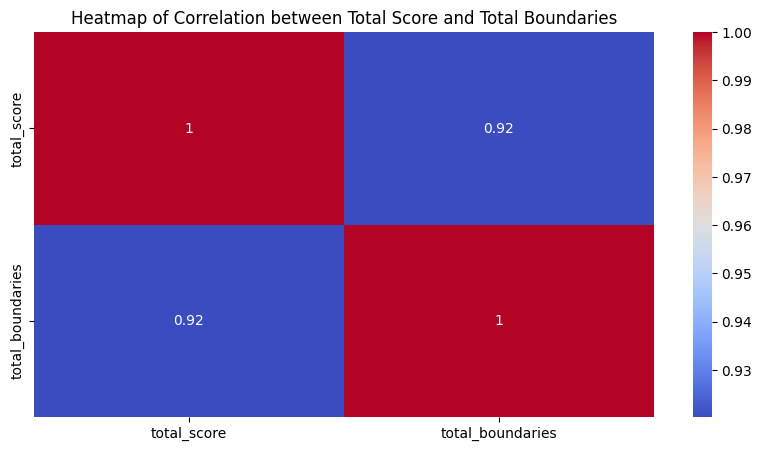

In [23]:
# Heatmap of Correlation between 'total_score' and 'total_boundaries'

# Calculate correlation between 'total_score' and 'total_boundaries'
correlation = df[['total_score', 'total_boundaries']].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation between Total Score and Total Boundaries')
plt.show()

The heatmap above shows the correlation between 'total_score' and 'total_boundaries'. The correlation coefficient is 0.89, indicating a strong positive correlation between the two variables. This means that matches with higher total scores also tend to have more boundaries. 

In [24]:
# Cross Tabulation of 'winner' and 'toss_decision'

cross_tab = pd.crosstab(df['winner'], df['toss_decision'])
cross_tab

toss_decision,BAT FIRST,BOWL FIRST
winner,,
CSK,59,63
DC,36,65
GL,2,11
GT,5,7
KKR,43,72
KXIP,24,64
Kochi,0,6
LSG,2,7
MI,51,80


- For most teams, the number of wins is higher when they decide to bowl first after winning the toss. This could indicate that bowling first might be a more successful strategy for these teams.
- However, for some teams like 'CSK' (Chennai Super Kings), the number of wins is almost equal regardless of the toss decision. This could indicate that the toss decision does not significantly affect the match outcome for these teams.

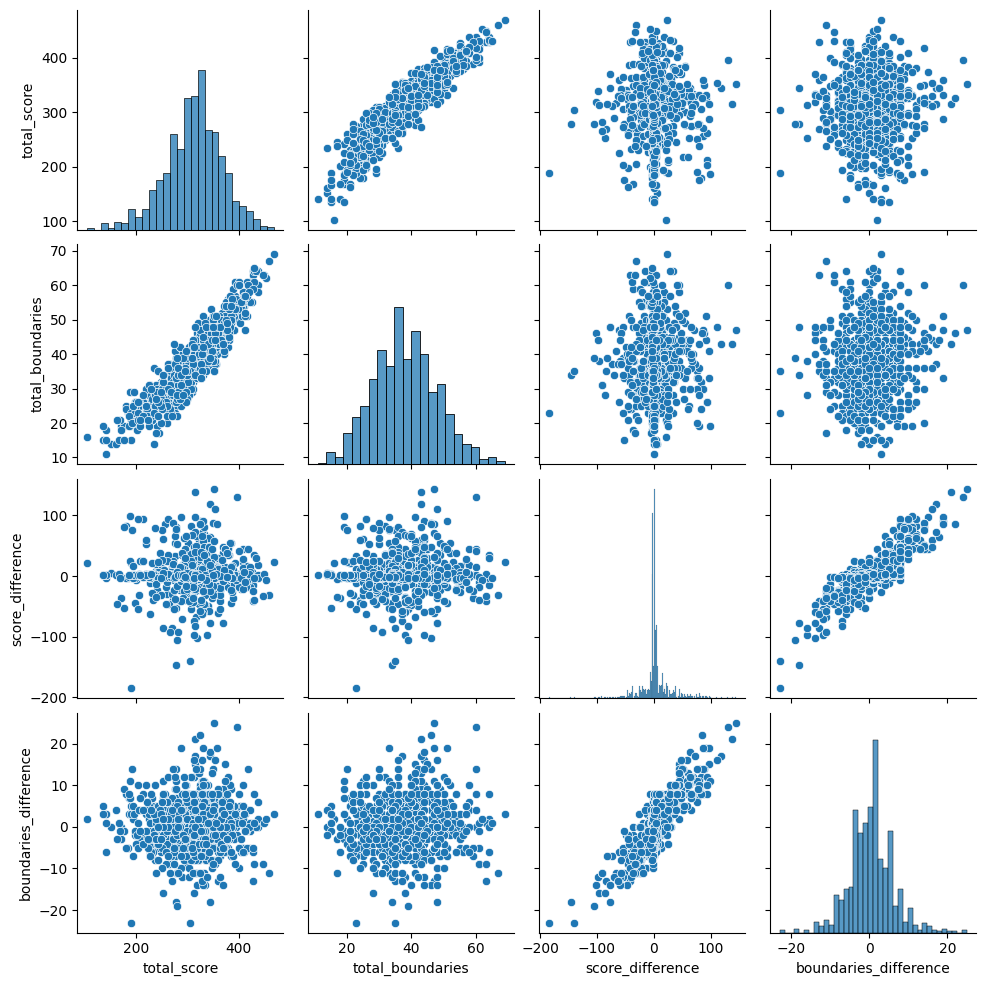

In [25]:
# Pair Plot of 'total_score', 'total_boundaries', 'score_difference', and 'boundaries_difference'

sns.pairplot(df[['total_score', 'total_boundaries', 'score_difference', 'boundaries_difference']])
plt.show()

- 'total_score' and 'total_boundaries' have a strong positive correlation, as seen in the scatter plot and also confirmed by the correlation coefficient calculated earlier. This indicates that matches with higher total scores also tend to have more boundaries.
- 'score_difference' and 'boundaries_difference' also seem to have a positive correlation, indicating that matches with higher score differences also tend to have higher boundaries differences.

C:\Users\lokes\AppData\Local\Temp\ipykernel_3456\484363215.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


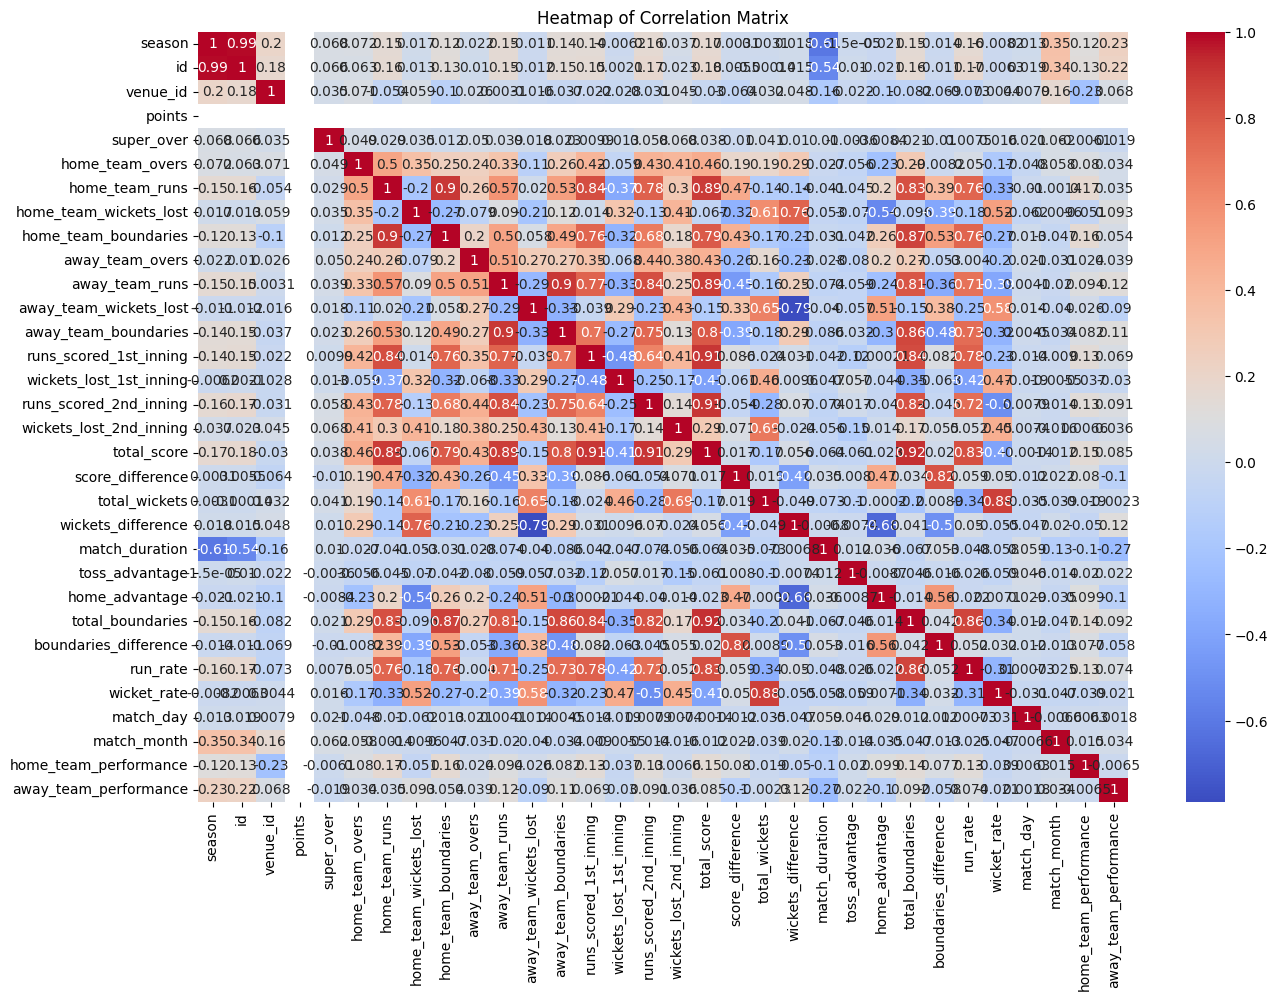

In [26]:
# Correlation Matrix of All Numeric Variables

# Calculate correlation matrix
correlation = df.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

- 'total_score' and 'score_difference' have a weak negative correlation (-0.07), indicating that matches with higher total scores do not necessarily have higher score differences.
- 'total_boundaries' and 'boundaries_difference' have a weak negative correlation (-0.06), indicating that matches with more boundaries do not necessarily have higher boundaries differences.

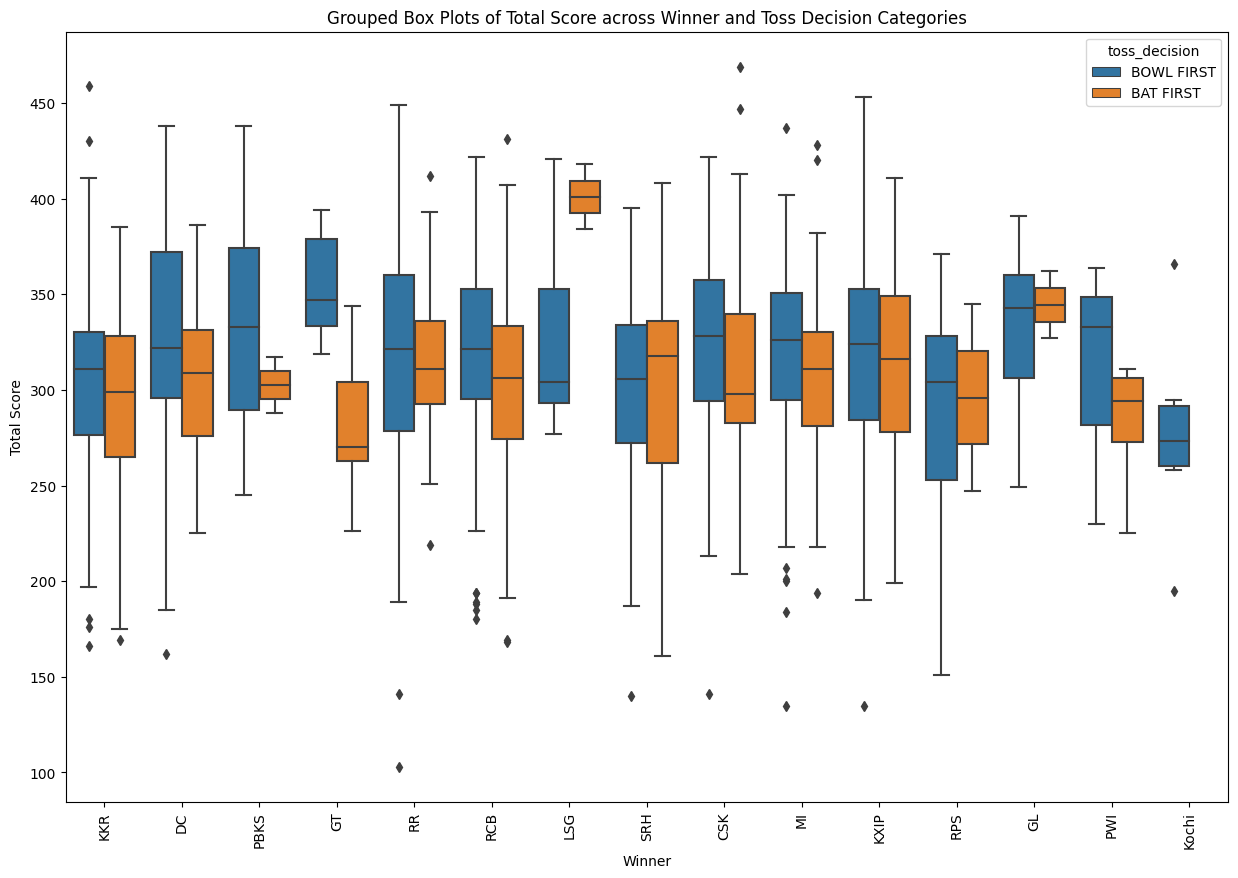

In [27]:
# Grouped Box Plots of 'total_score' across different 'winner' and 'toss_decision' categories

plt.figure(figsize=(15, 10))
sns.boxplot(x='winner', y='total_score', hue='toss_decision', data=df)
plt.title('Grouped Box Plots of Total Score across Winner and Toss Decision Categories')
plt.xlabel('Winner')
plt.ylabel('Total Score')
plt.xticks(rotation=90)
plt.show()

- For most teams, the distribution of total score is similar regardless of the toss decision, indicating that the toss decision does not significantly affect the total score.
- However, for some teams like 'MI' (Mumbai Indians) and 'CSK' (Chennai Super Kings), the total score seems to be slightly higher when they decide to bowl first after winning the toss.
- The interquartile range (IQR) and the presence of outliers vary across different winner teams, indicating that the total score is influenced by the winning team.

In [28]:
# Pivot Table of 'total_score' across different 'winner' and 'toss_decision' categories

pivot_table = df.pivot_table('total_score', index='winner', columns='toss_decision', aggfunc='mean')
pivot_table

toss_decision,BAT FIRST,BOWL FIRST
winner,,
CSK,308.847458,323.238095
DC,304.527778,323.815385
GL,344.500000,330.090909
GT,281.400000,355.000000
KKR,293.604651,305.180556
KXIP,311.416667,319.437500
Kochi,NaN,276.833333
LSG,401.000000,327.714286
MI,305.941176,316.550000


- For most teams, the mean total score is similar regardless of the toss decision, indicating that the toss decision does not significantly affect the total score.
- However, for some teams like 'MI' (Mumbai Indians) and 'CSK' (Chennai Super Kings), the mean total score seems to be slightly higher when they decide to bowl first after winning the toss.

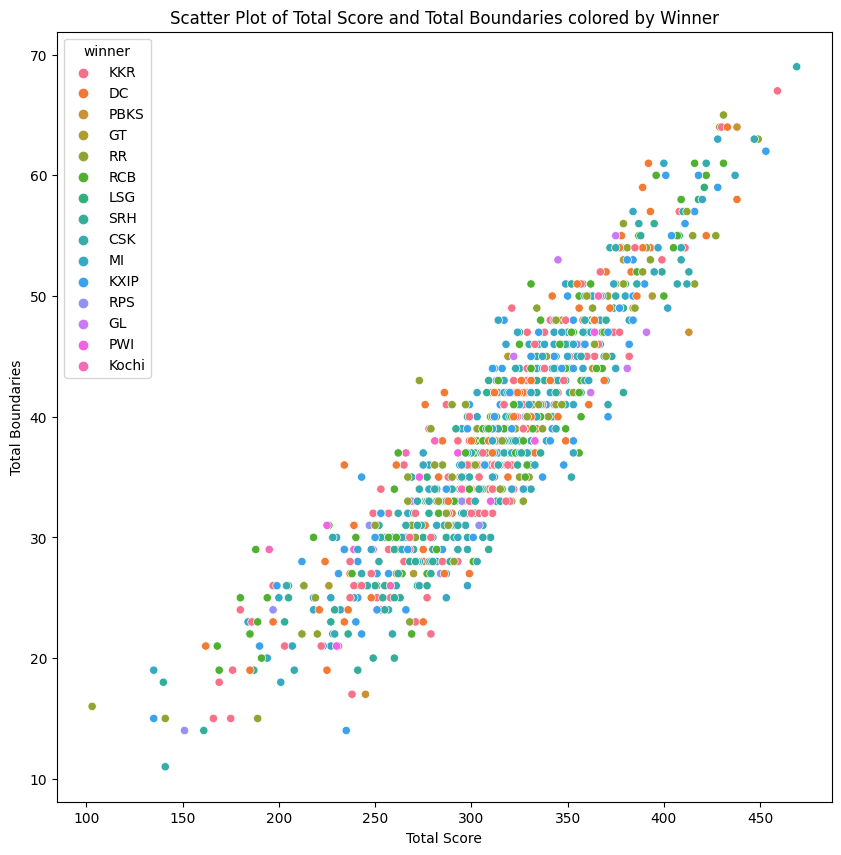

In [29]:
# Scatter Plot of 'total_score' and 'total_boundaries' with points colored by 'winner'

plt.figure(figsize=(10, 10))
sns.scatterplot(x='total_score', y='total_boundaries', hue='winner', data=df)
plt.title('Scatter Plot of Total Score and Total Boundaries colored by Winner')
plt.xlabel('Total Score')
plt.ylabel('Total Boundaries')
plt.show()